<center> </center>

<center><font size=5 face="Helvetica" color=#306998><b>
Meep Test: Simulation of Diffraction from perfectly conducting Half-plane
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>April, 2025</font></center>

***

In [14]:
import matplotlib.pyplot as plt
import meep as mp
import numpy as np

plt.rcParams["font.family"] = "Helvetica"
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [15]:
# Simulation parameters
wavelength = 1.0  # unit length
resolution = 50   # pixels per wavelength
cell_size = mp.Vector3(6*wavelength, 10*wavelength, 0)  # 6λ x 4λ x 0 (2D)
pml_layers = [mp.PML(1.0)]  # 1 wavelength thick PML

In [16]:
# Define the PEC boundary (infinite thin)
pec = mp.Medium(epsilon=1.0, D_conductivity=1e10)  # High conductivity for PEC
geometry = [mp.Block(center=mp.Vector3(1.5*wavelength, 0, 0),
                    size=mp.Vector3(3*wavelength, 0.01*wavelength, mp.inf),
                    material=pec)]

In [17]:
# Source parameters - plane wave from y direction
source_pos = mp.Vector3(0, 4*wavelength, 0)
source_size = mp.Vector3(6*wavelength, 0, 0)
source = mp.Source(mp.ContinuousSource(frequency=1.0/wavelength),
                  component=mp.Ez,
                  center=source_pos,
                  size=source_size)

In [18]:
# Create simulation
sim = mp.Simulation(cell_size=cell_size,
                   boundary_layers=pml_layers,
                   geometry=geometry,
                   sources=[source],
                   resolution=resolution)

In [19]:
# Run simulation until steady state
sim.run(until=50)  # Run for 50 time units

-----------
Initializing structure...
time for choose_chunkdivision = 0.00014 s
Working in 2D dimensions.
Computational cell is 6 x 10 x 0 with resolution 50
     block, center = (1.5,0,0)
          size (3,0.01,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.059946 s
time for set_conductivity = 0.002203 s
time for set_conductivity = 0.002192 s
time for set_conductivity = 0.002183 s
-----------


FloatProgress(value=0.0, description='0% done ', max=50.0)

run 0 finished at t = 50.0 (5000 timesteps)


In [20]:
# Get field data
ez_data = sim.get_array(center=mp.Vector3(0, 0, 0),
                       size=mp.Vector3(10*wavelength, 5*wavelength, 0),
                       component=mp.Ez)

     block, center = (1.5,0,0)
          size (3,0.01,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


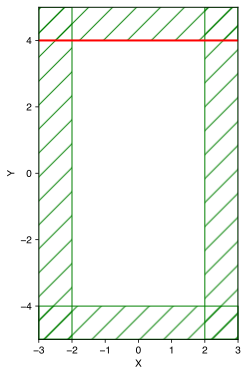

In [21]:
plt.figure(figsize=(8, 6))
sim.plot2D()
plt.show()

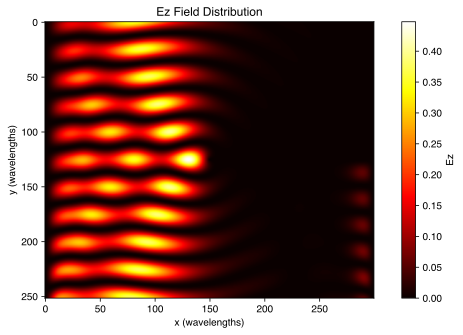

In [28]:
# Plot the field distribution
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(ez_data.T)**2,interpolation='spline36', cmap='hot')
plt.colorbar(label='Ez')
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.title('Ez Field Distribution')

plt.show() 